# To Join or Not to Join?


## analyze deaths of avengers from start of comics up to April 30,2015

In [2]:
import pandas as pd

In [4]:
avengers = pd.read_csv("avengers.csv",encoding='latin-1')
avengers

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,http://marvel.wikia.com/Eric_Brooks_(Earth-616)#,Eric Brooks,198,YES,MALE,NaN,13-Nov,2013,2,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,http://marvel.wikia.com/Adam_Brashear_(Earth-6...,Adam Brashear,29,YES,MALE,NaN,14-Jan,2014,1,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,http://marvel.wikia.com/Victor_Alvarez_(Earth-...,Victor Alvarez,45,YES,MALE,NaN,14-Jan,2014,1,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,http://marvel.wikia.com/Ava_Ayala_(Earth-616)#,Ava Ayala,49,YES,FEMALE,NaN,14-Jan,2014,1,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


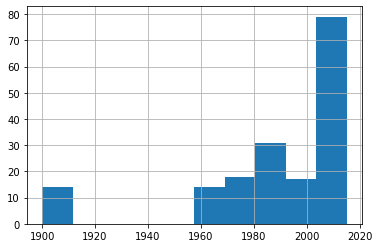

In [6]:
avengers.Year.hist()

## Since avengers weren't introduced until 1960's, data for avengers whose year of of joining was before 1960 may be erroneous. Will remove that data

In [7]:
avengers = avengers[avengers.Year >= 1960].copy()

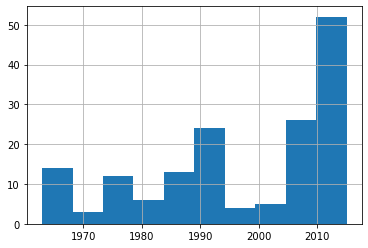

In [26]:
avengers.Year.hist()

## Chart how many female vs male avengers

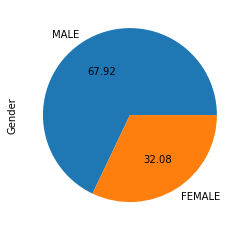

In [36]:
avengers.Gender.value_counts(normalize=True).plot.pie(autopct="%.2f")

## Top 10 Characters with Most Appearances

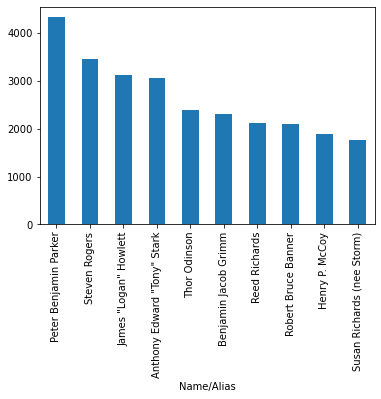

In [47]:
avengers.nlargest(10,'Appearances')[['Name/Alias','Appearances']].plot(kind='bar',x='Name/Alias',y='Appearances',legend=False)

## Consolidate Deaths to create column showing total deaths for each Avenger(characters may have more than one death)

In [9]:
death_columns = ['Death1','Death2',"Death3","Death4","Death5"]

In [13]:
avengers['deaths'] = (avengers[death_columns] == 'YES').sum(axis=1)

In [14]:
avengers

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes,deaths
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...,1
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...,1
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm...",1
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ...",1
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,http://marvel.wikia.com/Eric_Brooks_(Earth-616)#,Eric Brooks,198,YES,MALE,NaN,13-Nov,2013,2,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
169,http://marvel.wikia.com/Adam_Brashear_(Earth-6...,Adam Brashear,29,YES,MALE,NaN,14-Jan,2014,1,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
170,http://marvel.wikia.com/Victor_Alvarez_(Earth-...,Victor Alvarez,45,YES,MALE,NaN,14-Jan,2014,1,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
171,http://marvel.wikia.com/Ava_Ayala_(Earth-616)#,Ava Ayala,49,YES,FEMALE,NaN,14-Jan,2014,1,Full,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


## Verify accuracy of Years Joined column(Dataset was created in 2015 so have to base years joined to 2015)

In [17]:
(avengers['Year'] + avengers['Years since joining'] == 2015).all()

True

In [18]:
avengers['Died'] = avengers['deaths'] >= 1

In [24]:
len(avengers)

159

In [20]:
avengers.Died.sum() /len(avengers)

0.4276729559748428

In [21]:
avengers.deaths.sum()

88

In [22]:
avengers['Died Multiple'] = avengers['deaths'] >= 2

In [23]:
avengers['Died Multiple'].sum() / len(avengers)

0.10062893081761007

## 42% of characters who joined Avengers died at least one time.

## The total amount of deaths was 88(this includes possible multiple deaths)

## 10% of the Avengers characters died more than once